In [1]:
%reload_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import tensorly.kruskal_tensor as tl_kruskal
import tensorly.random as tl_rand
import numpy as np
from timeit import default_timer as timer

from cpd_mwu import CPD_MWU

Using numpy backend.


In [2]:
# Set up
lamb = 0.001
eps = 0.05 # 1/N where N = # interations
shape = (300,300,300)
nu = 2
rank = 5  
num_iterations = 5000

In [3]:
# Run experiment for sketching with weight update
sketching_rates = list(np.linspace(10**(-3), 10**(-1), 4)) + [1]
sketch_with_weight_update_error = np.array([0.0] * 401)

# Generate random latent factors
F = np.array(tl_rand.random_kruskal(shape=shape, rank=rank, full=False, random_state=np.random.RandomState(seed=0)))
X = tl_kruskal.kruskal_to_tensor(F)

# start = time.time()
# A,B,C, error = CPD_MWU(X, F, sketching_rates, lamb, eps, nu, rank, True, num_iterations)
# end = time.time()
# sketch_with_weight_update_error += error
    
# Print out total time
# print("Total time for 1 iterations:", end-start)


In [4]:
print(sketch_with_weight_update_error[0])
x = range(num_iterations+1)
plt.plot(x, error)

0.0


NameError: name 'error' is not defined

In [4]:
import statistics
from helper import norm
# Time norm
n = []

for i in range(100):
    start = timer()
    l = norm(X)
    end = timer()
    n.append(end-start)

mean_norm = statistics.mean(n)
var_norm = statistics.variance(n)

In [5]:
# Time norm
n = []

for i in range(100):
    start = timer()
    weights = np.array([1] * len(sketching_rates)) / (len(sketching_rates))
    end = timer()
    n.append(end-start)

mean_w = statistics.mean(n)
var_w = statistics.variance(n)

In [6]:
from helper import rand_init

# Time norm
n = []

for i in range(100):
    start = timer()
    dim_1, dim_2, dim_3 = X.shape
    weights = np.array([1] * len(sketching_rates)) / (len(sketching_rates))
    end = timer()
    n.append(end-start)

mean_rand = statistics.mean(n)
var_rand = statistics.variance(n)

<ErrorbarContainer object of 3 artists>

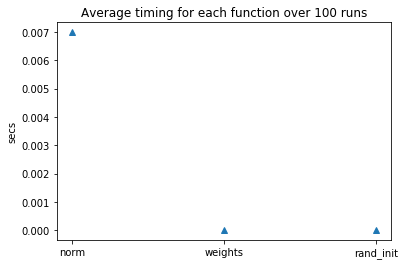

In [7]:
x = ['norm', 'weights', 'rand_init']
y = [mean_norm, mean_w, mean_rand]
var = [var_norm, var_w, var_rand]
plt.ylabel('secs')
plt.title('Average timing for each function over 100 runs')
plt.errorbar(x,y, var,linestyle='None', marker='^')

In [8]:
from helper import sample
from helper import rand_init
A, B, C = rand_init(dim_1, rank), rand_init(dim_2, rank), rand_init(dim_3, rank)
n= []

for i in range(100):
    start = timer()
    s = sample(sketching_rates, weights)
    end = timer()
    n.append(end-start)

mean_sample = statistics.mean(n)
var_sample = statistics.variance(n)

print(max(n))
print(mean_sample)
print(var_sample)

2.1760000000980995e-05
4.88640000009255e-06
3.111005091268633e-12


In [9]:
from helper import update_factors
n= []

for i in range(100):
    start = timer()
    s = sample(sketching_rates, weights)
    A,B,C = update_factors(A,B,C, X, lamb, s, rank)
    end = timer()
    n.append(end-start)

mean_up = statistics.mean(n)
var_up = statistics.variance(n)

print(max(n))
print(mean_up)
print(var_up)

1.1323883949999995
0.35966785942000007
0.10181862862399314


In [14]:
from helper import update_weights
from numpy import eye
n= []
norm_x = norm(X)
Id = eye(rank)
for i in range(100):
    start = timer()
    update_weights(A, B, C, X, Id, norm_x, lamb, weights, sketching_rates, rank, nu, eps)
    end = timer()
    n.append(end-start)

mean_weights = statistics.mean(n)
var_weights = statistics.variance(n)


print(max(n))
print(mean_weights)
print(var_weights)

4.359506969999984
4.2497273697699995
0.001669871916196729


In [58]:
from helper import residual_error

n= []
error = []
for i in range(100):
    start = timer()
    error.append(residual_error(X, norm_x, A,B,C))
    end = timer()
    n.append(end-start)

mean_err = statistics.mean(n)
var_err = statistics.variance(n)


print(max(n))
print(mean_err)
print(var_err)

0.25219343799972194
0.23690773957996497
2.115855284421237e-05


<ErrorbarContainer object of 3 artists>

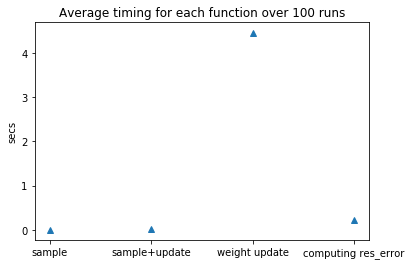

In [59]:
x = ['sample', 'sample+update', 'weight update', 'computing res_error']
y = [mean_sample, mean_up, mean_weights, mean_err]
var = [var_sample, var_up, var_weights, var_err]

plt.ylabel('secs')
plt.title('Average timing for each function over 100 runs')
plt.errorbar(x,y, var, linestyle='None', marker='^')

In [60]:
print(y)

[4.975989999982389e-06, 0.017806804600013493, 4.448841930340001, 0.23690773957996497]


In [62]:
n = []
n1 = []
n2 = []

for i in range(100):
    start = timer()
    X_bar = tl_kruskal.kruskal_to_tensor([A,B,C])
    end = timer()
    n.append(end-start)
    start = timer()
    y = X-X_bar
    end = timer()
    n1.append(end-start)
    start = timer()
    l = norm(y)
    end = timer()
    n2.append(end-start)

mean_tl = statistics.mean(n)
var_tl = statistics.variance(n)

mean_sub = statistics.mean(n1)
var_sub = statistics.variance(n1)

mean_norm = statistics.mean(n2)
var_norm = statistics.variance(n2)

<ErrorbarContainer object of 3 artists>

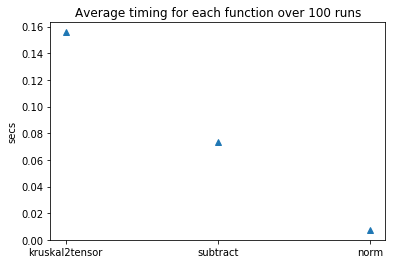

In [63]:
x = ['kruskal2tensor', 'subtract', 'norm']
y = [mean_tl, mean_sub, mean_norm]
var = [var_tl, var_sub, var_norm]

plt.ylabel('secs')
plt.title('Average timing for each function over 100 runs')
plt.errorbar(x,y, var, linestyle='None', marker='^')

In [64]:
print(y)
print(sum(y))

[0.15566575317999196, 0.07335510821998469, 0.007550673589985308]
0.23657153498996195


[0.0002337342599275871, 0.015322681370125792, 0.002805643040155701, 0.04837925220017496]
0.06674131087038404


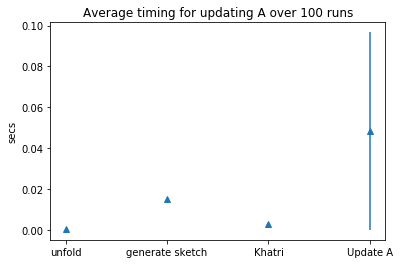

In [42]:
import tensorly.tenalg as tl_alg
import tensorly.base as tl_base
from helper import generate_sketch_indices
from numpy import eye
from numpy.linalg import pinv, norm

# Set up
lamb = 0.001
eps = 0.05 # 1/N where N = # interations
shape = (300,300,300)
nu = 2
rank = 5  
num_iterations = 5000

A, B, C = rand_init(300, rank), rand_init(300, rank), rand_init(300, rank)
# Run experiment for sketching with weight update
sketching_rates = list(np.linspace(10**(-3), 10**(-1), 4)) + [1]
sketch_with_weight_update_error = np.array([0.0] * 401)

# Generate random latent factors
F = np.array(tl_rand.random_kruskal(shape=shape, rank=rank, full=False, random_state=np.random.RandomState(seed=0)))
X = tl_kruskal.kruskal_to_tensor(F)

n = []
n1 = []
n2 = []
n3 = []
Id = eye(rank)

for i in range(100):
    s = sample(sketching_rates, weights)
    # unfold
    start = timer()
    X_unfold = tl_base.unfold(X, 0)
    end = timer()
    n.append(end-start)
    
    # Generate sketch indices
    start = timer()
    dim_1, dim_2 = X_unfold.shape
    idx = generate_sketch_indices(s, dim_2)
    end = timer()
    n1.append(end-start)
    
    # Compute khatri rao
    start = timer()
    M = (tl_alg.khatri_rao([A, B, C], skip_matrix=0).T)[:, idx]
    end = timer()
    n2.append(end-start)
    
    # Update A
    start = timer()
    C = (lamb * C + X_unfold[:, idx] @ M.T) @ pinv(M @ M.T + lamb * Id)
    end = timer()
    n3.append(end-start)


mean_uf = statistics.mean(n)
var_uf = statistics.variance(n)

mean_gs = statistics.mean(n1)
var_gs = statistics.variance(n1)

mean_kr = statistics.mean(n2)
var_kr = statistics.variance(n2)

mean_up = statistics.mean(n3)
var_up = statistics.variance(n3)

x = ['unfold', 'generate sketch', 'Khatri', 'Update A']
y = [mean_uf, mean_gs, mean_kr, mean_up]
var = [var_uf, var_gs, var_kr, mean_up]

plt.ylabel('secs')
plt.title('Average timing for updating A over 100 runs')
plt.errorbar(x,y, var, linestyle='None', marker='^')

print(y)
print(sum(y))

[0.11610387770011585, 0.016916510770170135, 0.003594535289776104, 0.06090464263976173]
0.19751956639982382


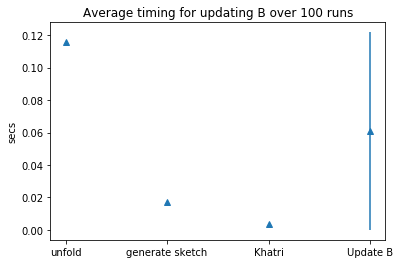

In [44]:
import tensorly.tenalg as tl_alg
import tensorly.base as tl_base
from helper import generate_sketch_indices
from numpy import eye
from numpy.linalg import pinv, norm

# Set up
lamb = 0.001
eps = 0.05 # 1/N where N = # interations
shape = (300,300,300)
nu = 2
rank = 5  
num_iterations = 5000

A, B, C = rand_init(300, rank), rand_init(300, rank), rand_init(300, rank)

# Run experiment for sketching with weight update
sketching_rates = list(np.linspace(10**(-3), 10**(-1), 4)) + [1]
sketch_with_weight_update_error = np.array([0.0] * 401)

# Generate random latent factors
F = np.array(tl_rand.random_kruskal(shape=shape, rank=rank, full=False, random_state=np.random.RandomState(seed=0)))
X = tl_kruskal.kruskal_to_tensor(F)

n = []
n1 = []
n2 = []
n3 = []
Id = eye(rank)

for i in range(100):
    s = sample(sketching_rates, weights)
    # unfold
    start = timer()
    X_unfold = tl_base.unfold(X, 1)
    end = timer()
    n.append(end-start)
    
    # Generate sketch indices
    start = timer()
    dim_1, dim_2 = X_unfold.shape
    idx = generate_sketch_indices(s, dim_2)
    end = timer()
    n1.append(end-start)
    
    # Compute khatri rao
    start = timer()
    M = (tl_alg.khatri_rao([A, B, C], skip_matrix=1).T)[:, idx]
    end = timer()
    n2.append(end-start)
    
    # Update A
    start = timer()
    C = (lamb * C + X_unfold[:, idx] @ M.T) @ pinv(M @ M.T + lamb * Id)
    end = timer()
    n3.append(end-start)
    

mean_uf = statistics.mean(n)
var_uf = statistics.variance(n)

mean_gs = statistics.mean(n1)
var_gs = statistics.variance(n1)

mean_kr = statistics.mean(n2)
var_kr = statistics.variance(n2)

mean_up = statistics.mean(n3)
var_up = statistics.variance(n3)

x = ['unfold', 'generate sketch', 'Khatri', 'Update B']
y = [mean_uf, mean_gs, mean_kr, mean_up]
var = [var_uf, var_gs, var_kr, mean_up]

plt.ylabel('secs')
plt.title('Average timing for updating B over 100 runs')
plt.errorbar(x,y, var, linestyle='None', marker='^')

print(y)
print(sum(y))

[0.0002572286399663426, 0.015668121180169692, 0.002804839850177814, 0.020091567900017253]
0.0388217575703311


<ErrorbarContainer object of 3 artists>

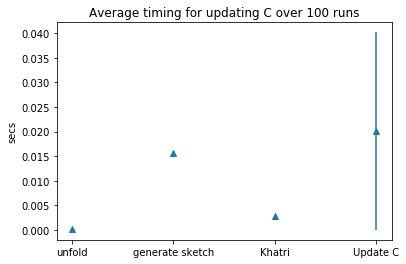

In [47]:
import tensorly.tenalg as tl_alg
import tensorly.base as tl_base
from helper import generate_sketch_indices
from numpy import eye
from numpy.linalg import pinv, norm

# Set up
lamb = 0.001
eps = 0.05 # 1/N where N = # interations
shape = (300,300,300)
nu = 2
rank = 5  
num_iterations = 5000

A, B, C = rand_init(300, rank), rand_init(300, rank), rand_init(300, rank)
# Run experiment for sketching with weight update
sketching_rates = list(np.linspace(10**(-3), 10**(-1), 4)) + [1]
sketch_with_weight_update_error = np.array([0.0] * 401)

# Generate random latent factors
F = np.array(tl_rand.random_kruskal(shape=shape, rank=rank, full=False, random_state=np.random.RandomState(seed=0)))
X = tl_kruskal.kruskal_to_tensor(F)

n = []
n1 = []
n2 = []
n3 = []
Id = eye(rank)

for i in range(100):
    s = sample(sketching_rates, weights)
    # unfold
    start = timer()
    X_unfold = tl_base.unfold(X, 2)
    end = timer()
    n.append(end-start)
    
    # Generate sketch indices
    start = timer()
    dim_1, dim_2 = X_unfold.shape
    idx = generate_sketch_indices(s, dim_2)
    end = timer()
    n1.append(end-start)
    
    # Compute khatri rao
    start = timer()
    M = (tl_alg.khatri_rao([A, B, C], skip_matrix=2).T)[:, idx]
    end = timer()
    n2.append(end-start)
    
    # Update A
    start = timer()
    C = (lamb * C + X_unfold[:, idx] @ M.T) @ pinv(M @ M.T + lamb * Id)
    end = timer()
    n3.append(end-start)


mean_uf = statistics.mean(n)
var_uf = statistics.variance(n)

mean_gs = statistics.mean(n1)
var_gs = statistics.variance(n1)

mean_kr = statistics.mean(n2)
var_kr = statistics.variance(n2)

mean_up = statistics.mean(n3)
var_up = statistics.variance(n3)

x = ['unfold', 'generate sketch', 'Khatri', 'Update C']
y = [mean_uf, mean_gs, mean_kr, mean_up]
var = [var_uf, var_gs, var_kr, mean_up]

print(y)
print(sum(y))
plt.ylabel('secs')
plt.title('Average timing for updating C over 100 runs')
plt.errorbar(x,y, var, linestyle='None', marker='^')

In [36]:
print(y)
 

[0.00024208944999145387, 0.015839039469994987, 0.0030523788099822012, 0.026283627980005803]
0.045417135709974445
